In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_json(
    "../data/raw/problems_data.jsonl",
    lines=True
)

df.head()


,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree


In [4]:
df.shape


(4112, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   sample_io           4112 non-null   object 
 5   problem_class       4112 non-null   object 
 6   problem_score       4112 non-null   float64
 7   url                 4112 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.1+ KB


In [6]:
df.isnull().sum()


title                 0
description           0
input_description     0
output_description    0
sample_io             0
problem_class         0
problem_score         0
url                   0
dtype: int64

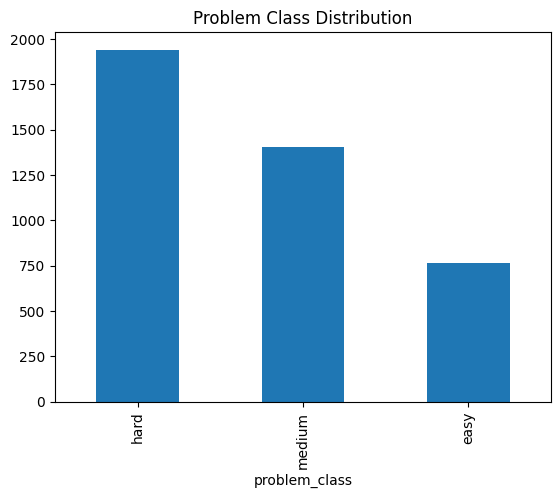

In [7]:
df['problem_class'].value_counts().plot(
    kind='bar',
    title='Problem Class Distribution'
)
plt.show()


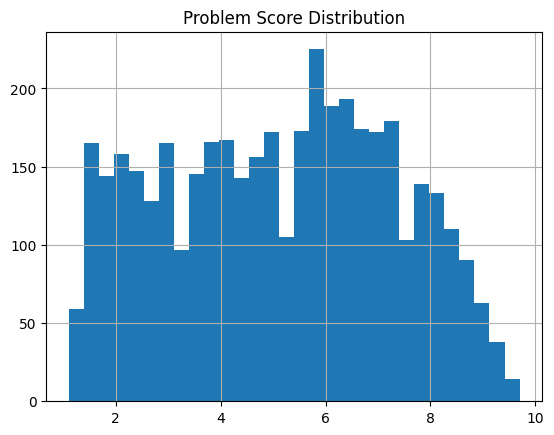

In [8]:
df['problem_score'].hist(bins=30)
plt.title("Problem Score Distribution")
plt.show()


In [9]:
df['full_text'] = (
    df['title'] + ' ' +
    df['description'] + ' ' +
    df['input_description'] + ' ' +
    df['output_description']
)

df[['full_text']].head()


,full_text
0,Uuu Unununium (Uuu) was the name of the chemic...
1,House Building A number of eccentrics from cen...
2,Mario or Luigi Mario and Luigi are playing a g...
3,The Wire Ghost Žofka is bending a copper wire....
4,Barking Up The Wrong Tree Your dog Spot is let...


In [10]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


In [11]:
df['full_text'] = df['full_text'].apply(clean_text)


In [12]:
df['full_text'].iloc[0][:300]


'uuu unununium uuu was the name of the chemical element with atom number 111 until it changed to r ntgenium rg in 2004 these heavy elements are very unstable and have only been synthesized in a few laboratories you have just been hired by one of these labs to optimize the algorithms used in simulatio'

In [13]:
import os

os.makedirs("../data/processed", exist_ok=True)


In [14]:
df.to_csv("../data/processed/cleaned_data.csv", index=False)


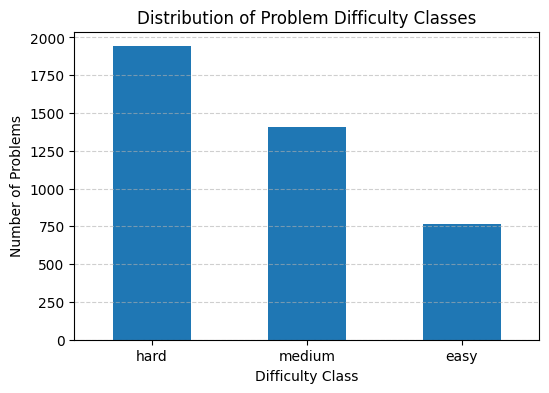

In [15]:
import matplotlib.pyplot as plt

class_counts = df['problem_class'].value_counts()

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title("Distribution of Problem Difficulty Classes")
plt.xlabel("Difficulty Class")
plt.ylabel("Number of Problems")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


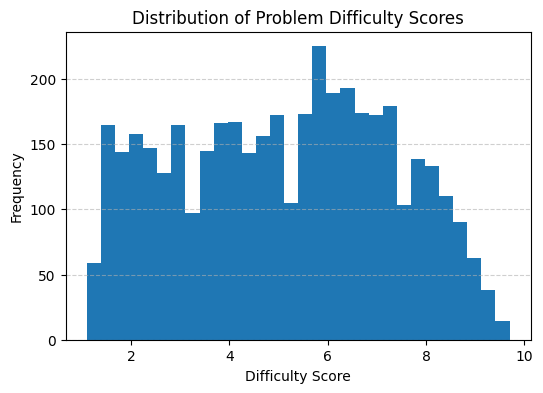

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df['problem_score'], bins=30)
plt.title("Distribution of Problem Difficulty Scores")
plt.xlabel("Difficulty Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


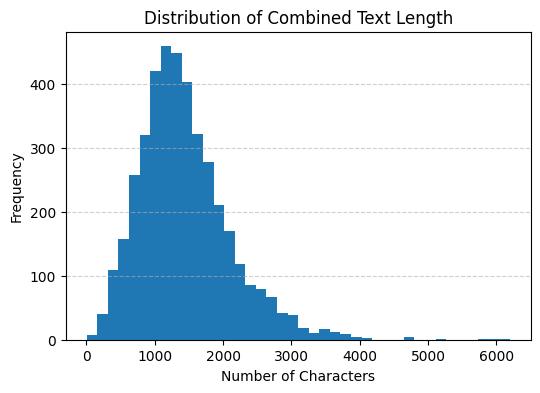

In [17]:
df['text_length'] = df['full_text'].apply(len)

plt.figure(figsize=(6,4))
plt.hist(df['text_length'], bins=40)
plt.title("Distribution of Combined Text Length")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


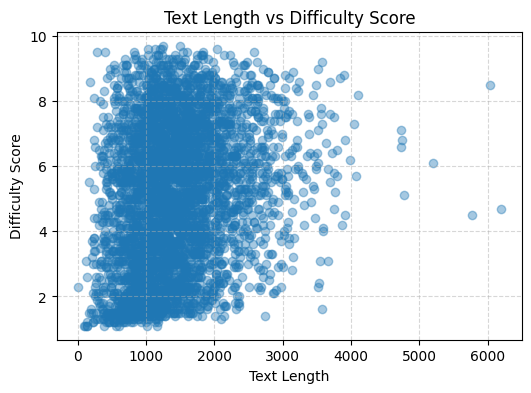

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df['text_length'], df['problem_score'], alpha=0.4)
plt.title("Text Length vs Difficulty Score")
plt.xlabel("Text Length")
plt.ylabel("Difficulty Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Figure size 600x400 with 0 Axes>

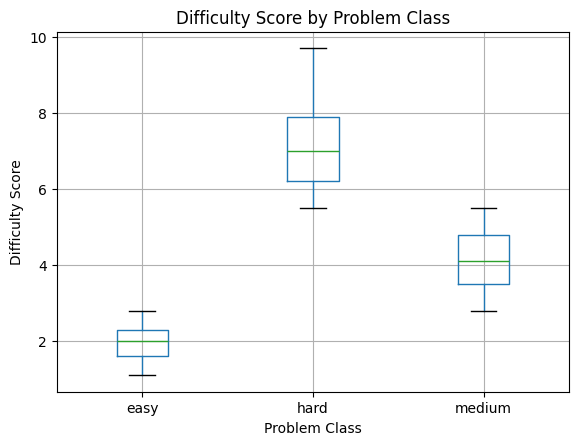

In [19]:
plt.figure(figsize=(6,4))
df.boxplot(column='problem_score', by='problem_class')
plt.title("Difficulty Score by Problem Class")
plt.suptitle("")
plt.xlabel("Problem Class")
plt.ylabel("Difficulty Score")
plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

def top_words(class_name, n=10):
    texts = df[df['problem_class'] == class_name]['full_text']
    vec = CountVectorizer(stop_words='english', max_features=1000)
    X = vec.fit_transform(texts)
    word_freq = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    return sorted(zip(vocab, word_freq), key=lambda x: x[1], reverse=True)[:n]

for cls in df['problem_class'].unique():
    print(f"\nTop words in {cls} problems:")
    print(top_words(cls))



Top words in hard problems:
[('number', np.int64(4668)), ('line', np.int64(3813)), ('leq', np.int64(3702)), ('le', np.int64(2364)), ('input', np.int64(2150)), ('output', np.int64(1990)), ('integer', np.int64(1862)), ('contains', np.int64(1860)), ('integers', np.int64(1837)), ('10', np.int64(1684))]

Top words in medium problems:
[('number', np.int64(3303)), ('line', np.int64(2736)), ('leq', np.int64(2448)), ('le', np.int64(1673)), ('input', np.int64(1578)), ('output', np.int64(1403)), ('integer', np.int64(1364)), ('contains', np.int64(1247)), ('integers', np.int64(1207)), ('10', np.int64(1178))]

Top words in easy problems:
[('number', np.int64(1450)), ('line', np.int64(1424)), ('leq', np.int64(904)), ('input', np.int64(883)), ('output', np.int64(722)), ('le', np.int64(718)), ('single', np.int64(713)), ('integer', np.int64(707)), ('contains', np.int64(638)), ('integers', np.int64(477))]
